# **E-Commerce Product Delivery Prediction**


- The aim of this project to predict whether the product from an e-commerce company will reach on time or not. This project also analyzes various factors that affect the delivery of the product as well as studies the customer behavior.
- An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/E_Commerce.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Data Preprocessing and EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
df.drop(['ID'], axis=1, inplace=True)

In [7]:
df.isnull().sum()

,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0
Weight_in_gms,0


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [10]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


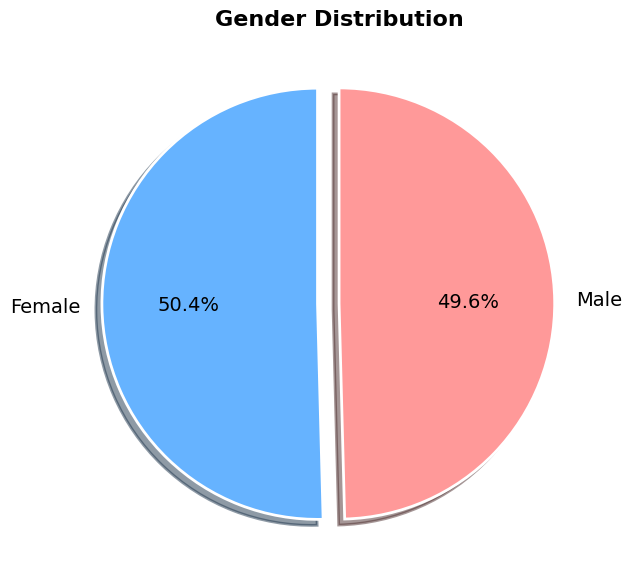

In [11]:
import matplotlib.pyplot as plt

# Dữ liệu cho biểu đồ
gender_counts = df['Gender'].value_counts()
colors = ['#66b3ff', '#ff9999']

explode = (0.1, 0)

plt.figure(figsize=(7,7))
plt.pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode, shadow=True, textprops={'fontsize': 14, 'color': 'black'},
        wedgeprops={'edgecolor': 'white', 'linewidth': 2})
plt.title('Gender Distribution', fontsize=16, fontweight='bold')
plt.show()


- The dataset has the equal number of both males and female customers, with percentage of 49.6% and 50.4% respectively.

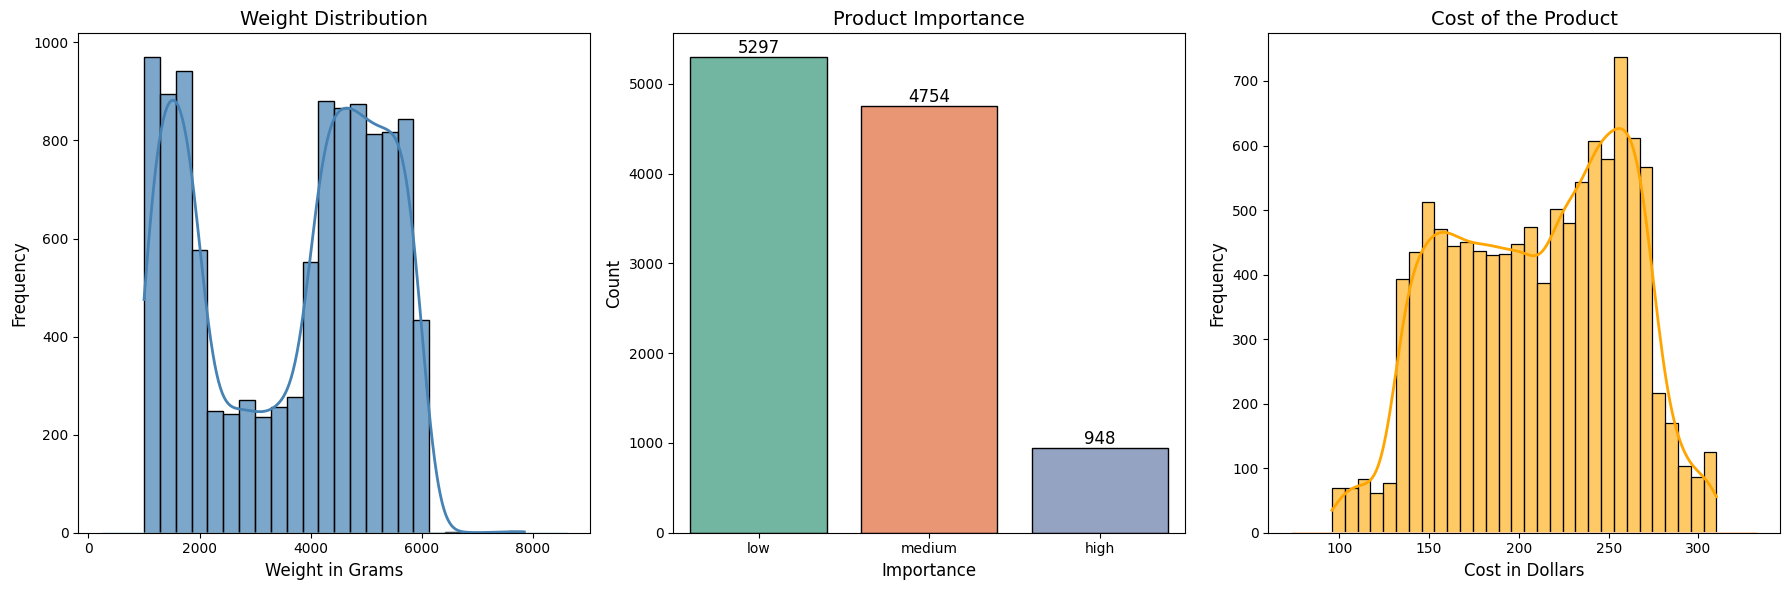

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo figure với 3 trục (axes)
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Tùy chỉnh màu sắc và kiểu vẽ cho biểu đồ thứ nhất (Weight Distribution)
sns.histplot(df['Weight_in_gms'], ax=ax[0], kde=True, color='steelblue',
             line_kws={'linewidth': 2}, alpha=0.7).set_title('Weight Distribution', fontsize=14)
ax[0].set_xlabel('Weight in Grams', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)

# Vẽ đường KDE với fill để làm mềm biểu đồ
sns.kdeplot(df['Weight_in_gms'], ax=ax[0], fill=True, color='lightblue', alpha=0.3)

# Biểu đồ thứ hai (Product Importance) với palette tùy chỉnh và edgecolor
sns.countplot(x='Product_importance', data=df, ax=ax[1], palette='Set2',
              edgecolor='black').set_title('Product Importance', fontsize=14)
ax[1].set_xlabel('Importance', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)

# Thêm nhãn cho các cột trong countplot
for container in ax[1].containers:
    ax[1].bar_label(container, fontsize=12, color='black')

# Biểu đồ thứ ba (Cost of the Product) với KDE fill và màu tùy chỉnh
sns.histplot(df['Cost_of_the_Product'], ax=ax[2], kde=True, color='orange',
             line_kws={'linewidth': 2}, alpha=0.6).set_title('Cost of the Product', fontsize=14)
ax[2].set_xlabel('Cost in Dollars', fontsize=12)
ax[2].set_ylabel('Frequency', fontsize=12)

# Vẽ đường KDE với fill và màu
sns.kdeplot(df['Cost_of_the_Product'], ax=ax[2], fill=True, color='peachpuff', alpha=0.3)

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()



- These three graphs explain the distribution of product properties - Weight, Cost and Importance in the dataset. Firstly, looking at the weight distribution, we can see that the products weighing between 1000-2000 grams and 4000-6000 grams are more in number. This means that the company is selling more of the products in these weight ranges. The second graph is about the product importance, where majority of the products have low or medium importance. The third graph is about the cost of the product. Third graph is about the cost distribution of the products, where there is increased distribution between 150-200 and 225-275 dollars.

- From this, I conclude that majority of the products are lighter than 6000 grams, have low or medium importance and costs between 150-275 dollars.

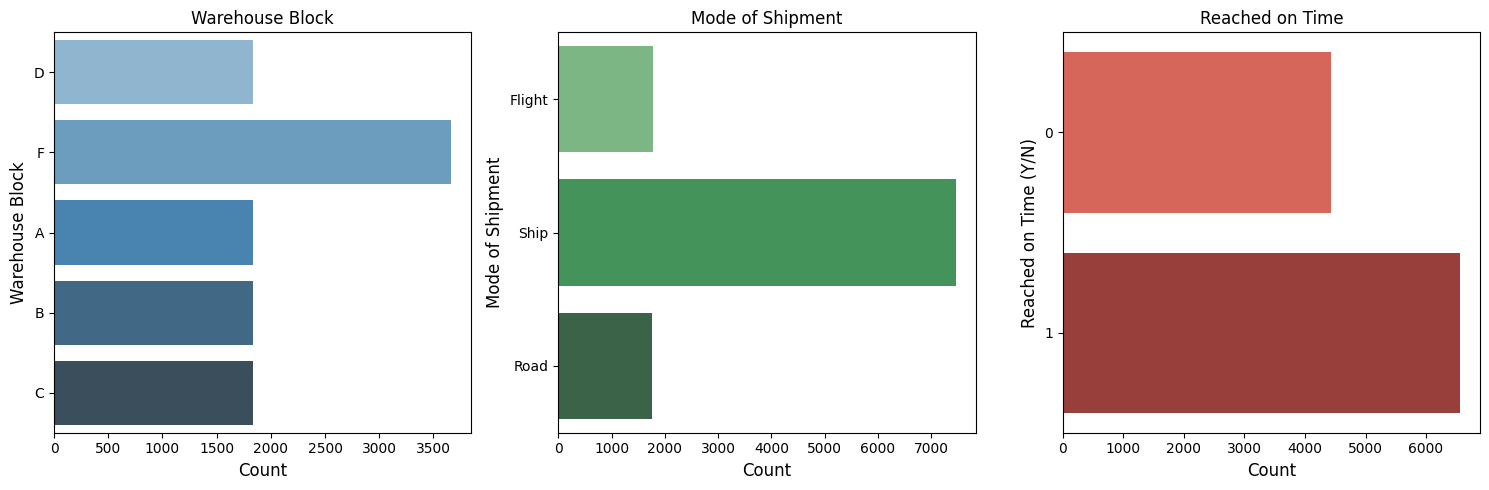

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Biểu đồ thanh ngang cho Warehouse Block
sns.countplot(y='Warehouse_block', data=df, ax=ax[0], palette='Blues_d').set_title('Warehouse Block')
ax[0].set_xlabel('Count', fontsize=12)
ax[0].set_ylabel('Warehouse Block', fontsize=12)

# Biểu đồ thanh ngang cho Mode of Shipment
sns.countplot(y='Mode_of_Shipment', data=df, ax=ax[1], palette='Greens_d').set_title('Mode of Shipment')
ax[1].set_xlabel('Count', fontsize=12)
ax[1].set_ylabel('Mode of Shipment', fontsize=12)

# Biểu đồ thanh ngang cho Reached on Time
sns.countplot(y='Reached.on.Time_Y.N', data=df, ax=ax[2], palette='Reds_d').set_title('Reached on Time')
ax[2].set_xlabel('Count', fontsize=12)
ax[2].set_ylabel('Reached on Time (Y/N)', fontsize=12)

plt.tight_layout()
plt.show()


- The graphs illustrate product logistics and delivery. The first shows that warehouse F handles the most products (about 3,500), while the others have similar volumes. The second graph indicates that most products are shipped by sea, with around 2,000 shipped by air and road. The third graph shows more products are delivered on time than late. Based on these graphs, it's likely that warehouse F is near a seaport, as it handles the most products and ships primarily by sea.

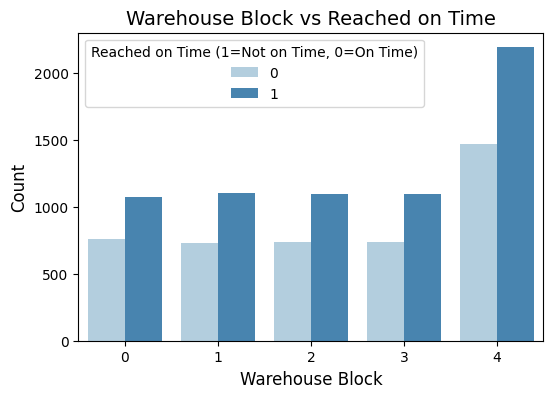

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Warehouse_block', hue='Reached.on.Time_Y.N', data=df, palette='Blues')
plt.title('Warehouse Block vs Reached on Time', fontsize=14)
plt.xlabel('Warehouse Block', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Reached on Time (1=Not on Time, 0=On Time)')
plt.show()


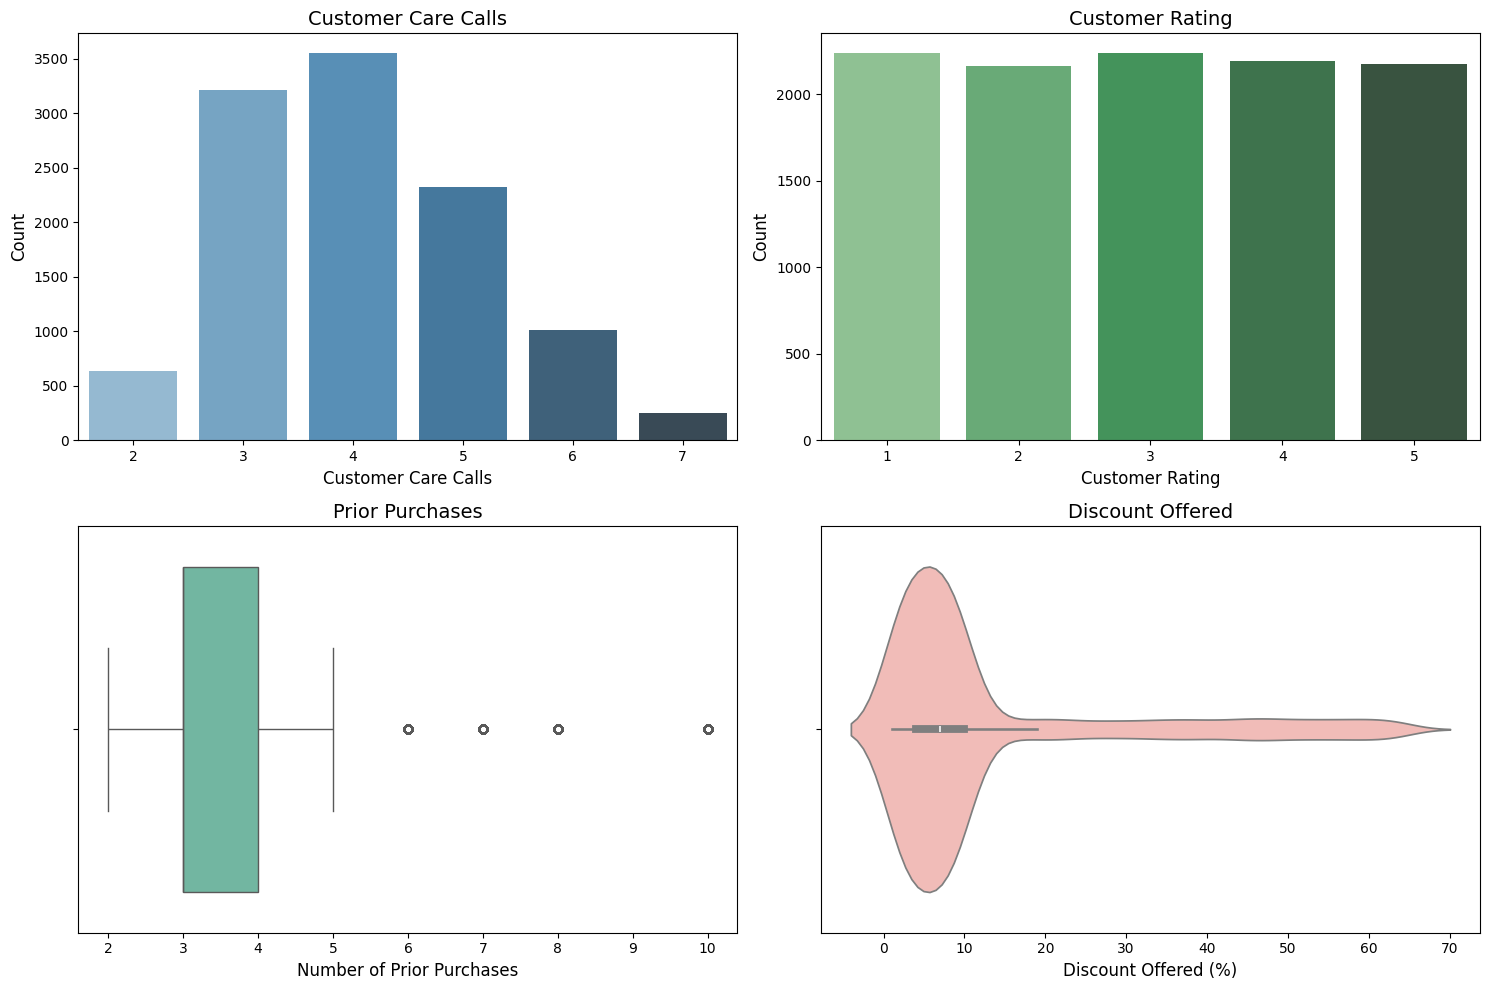

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo figure với 2 hàng và 2 cột
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Countplot dọc cho Customer Care Calls
sns.countplot(x='Customer_care_calls', data=df, ax=ax[0, 0], palette='Blues_d')
ax[0, 0].set_title('Customer Care Calls', fontsize=14)
ax[0, 0].set_xlabel('Customer Care Calls', fontsize=12)
ax[0, 0].set_ylabel('Count', fontsize=12)

# Countplot dọc cho Customer Rating
sns.countplot(x='Customer_rating', data=df, ax=ax[0, 1], palette='Greens_d')
ax[0, 1].set_title('Customer Rating', fontsize=14)
ax[0, 1].set_xlabel('Customer Rating', fontsize=12)
ax[0, 1].set_ylabel('Count', fontsize=12)

# Boxplot cho Prior Purchases
sns.boxplot(x='Prior_purchases', data=df, ax=ax[1, 0], palette='Set2')
ax[1, 0].set_title('Prior Purchases', fontsize=14)
ax[1, 0].set_xlabel('Number of Prior Purchases', fontsize=12)

# Violin Plot cho Discount Offered
sns.violinplot(x='Discount_offered', data=df, ax=ax[1, 1], palette='Pastel1')
ax[1, 1].set_title('Discount Offered', fontsize=14)
ax[1, 1].set_xlabel('Discount Offered (%)', fontsize=12)

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


- The graphs visualize customer experience based on calls, ratings, prior purchases, and discounts. The first shows most customers made 3-4 care calls, indicating possible delivery issues. The second reveals slightly higher dissatisfaction, with more ratings of 1. The third graph shows most customers made 2-3 prior purchases, indicating satisfaction and repeat buying. Finally, the fourth graph highlights that most products had a 0-10% discount, suggesting the company offers limited discounts.

### Customer Gener and Reach on time

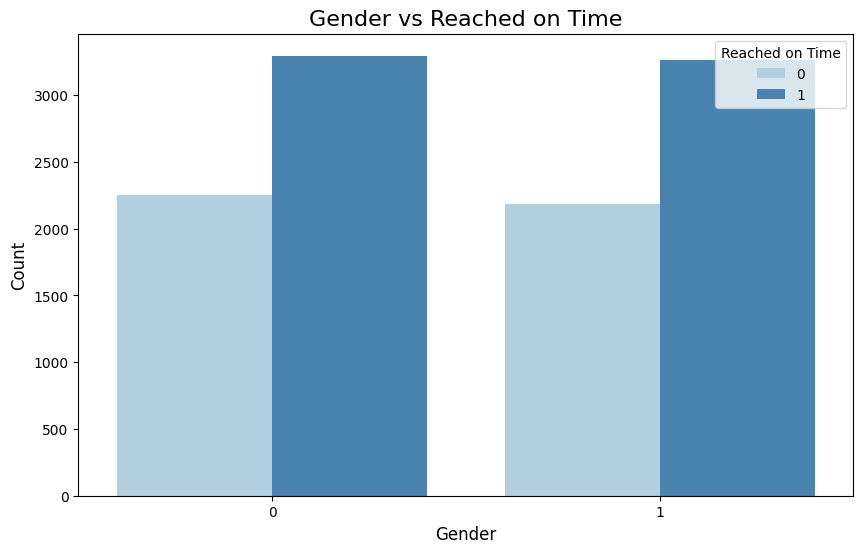

In [26]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Reached.on.Time_Y.N', data=df, palette='Blues')

plt.title('Gender vs Reached on Time', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Reached on Time', loc='upper right')

plt.show()



-
The number of products timely delivered for both the genders is same, which means there is no relation of customer gender and product delivery.

#### Product Properties and Product Delivery


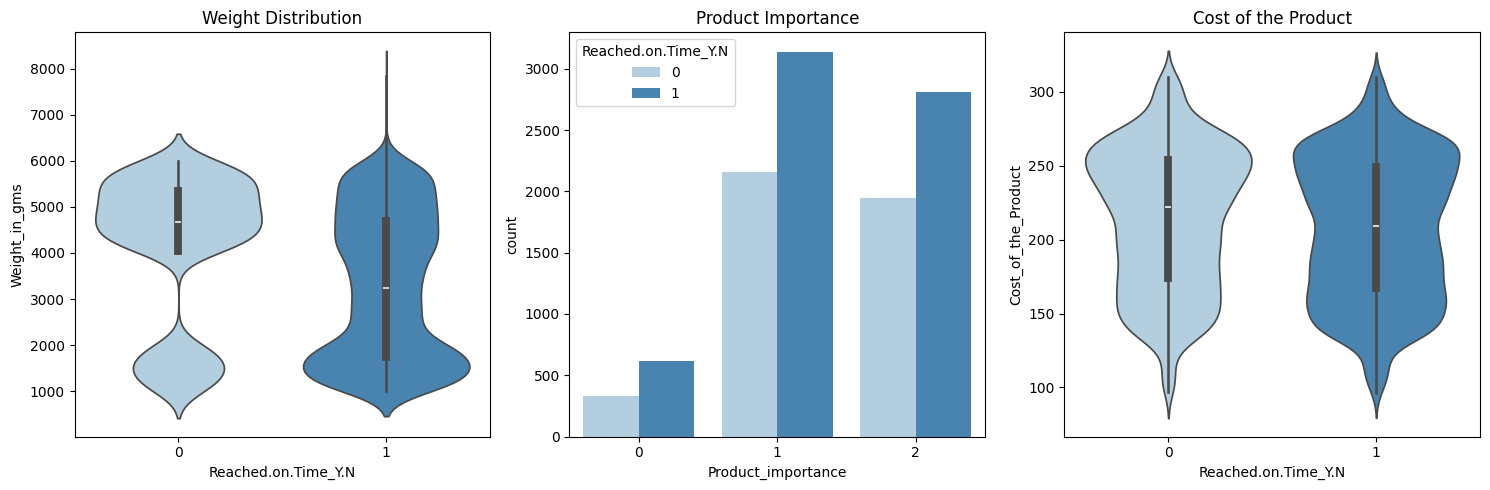

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.violinplot(y='Weight_in_gms', x='Reached.on.Time_Y.N', data=df, ax=ax[0], palette='Blues').set_title('Weight Distribution')

sns.countplot(x='Product_importance', data=df, ax=ax[1], hue='Reached.on.Time_Y.N', palette='Blues').set_title('Product Importance')

sns.violinplot(y='Cost_of_the_Product', x='Reached.on.Time_Y.N', data=df, ax=ax[2], palette='Blues').set_title('Cost of the Product')

plt.tight_layout()

plt.show()



- The plots show the relationship between product properties and delivery. The first graph highlights that heavier products (over 4,500 grams) are often delayed, while those weighing 2,500-3,500 grams are delivered on time. The second graph indicates no significant impact of product importance on delivery. The third graph reveals that products costing over $250 are more likely to be delayed.

- In summary, product weight and cost affect delivery timing.

#### Logistics and Product Delivery

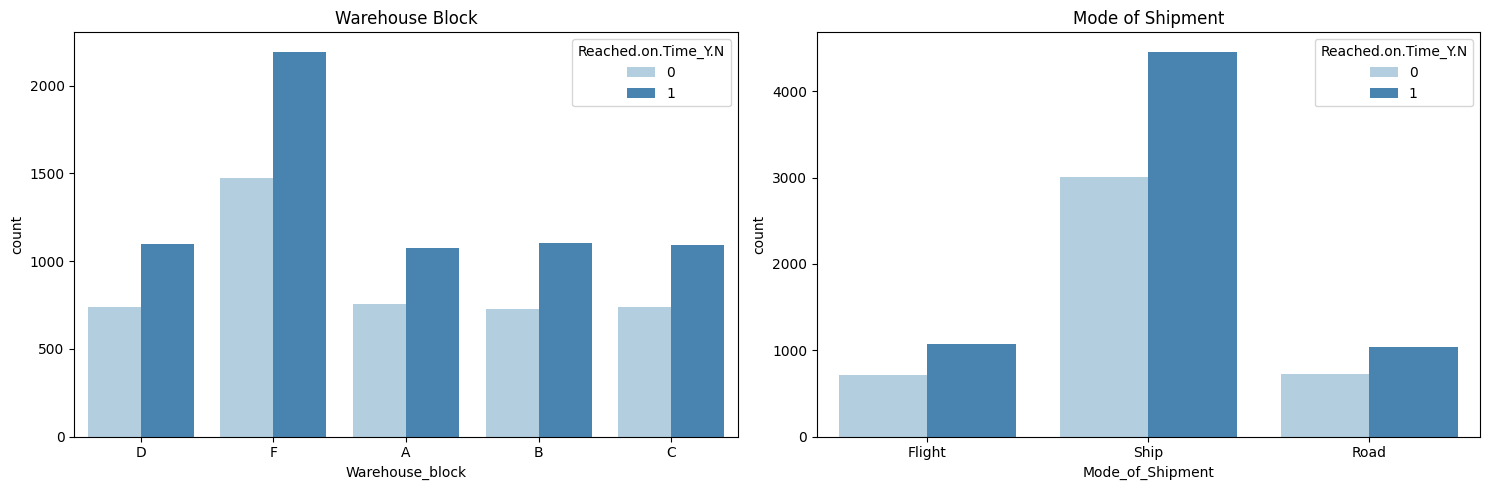

In [20]:

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='Warehouse_block', data=df, ax=ax[0], hue='Reached.on.Time_Y.N', palette='Blues').set_title('Warehouse Block')

sns.countplot(x='Mode_of_Shipment', data=df, ax=ax[1], hue='Reached.on.Time_Y.N', palette='Blues').set_title('Mode of Shipment')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


- the logistic and mode of shipment has no impact on the product delivery.

#### Customer Experience and Product Delivery

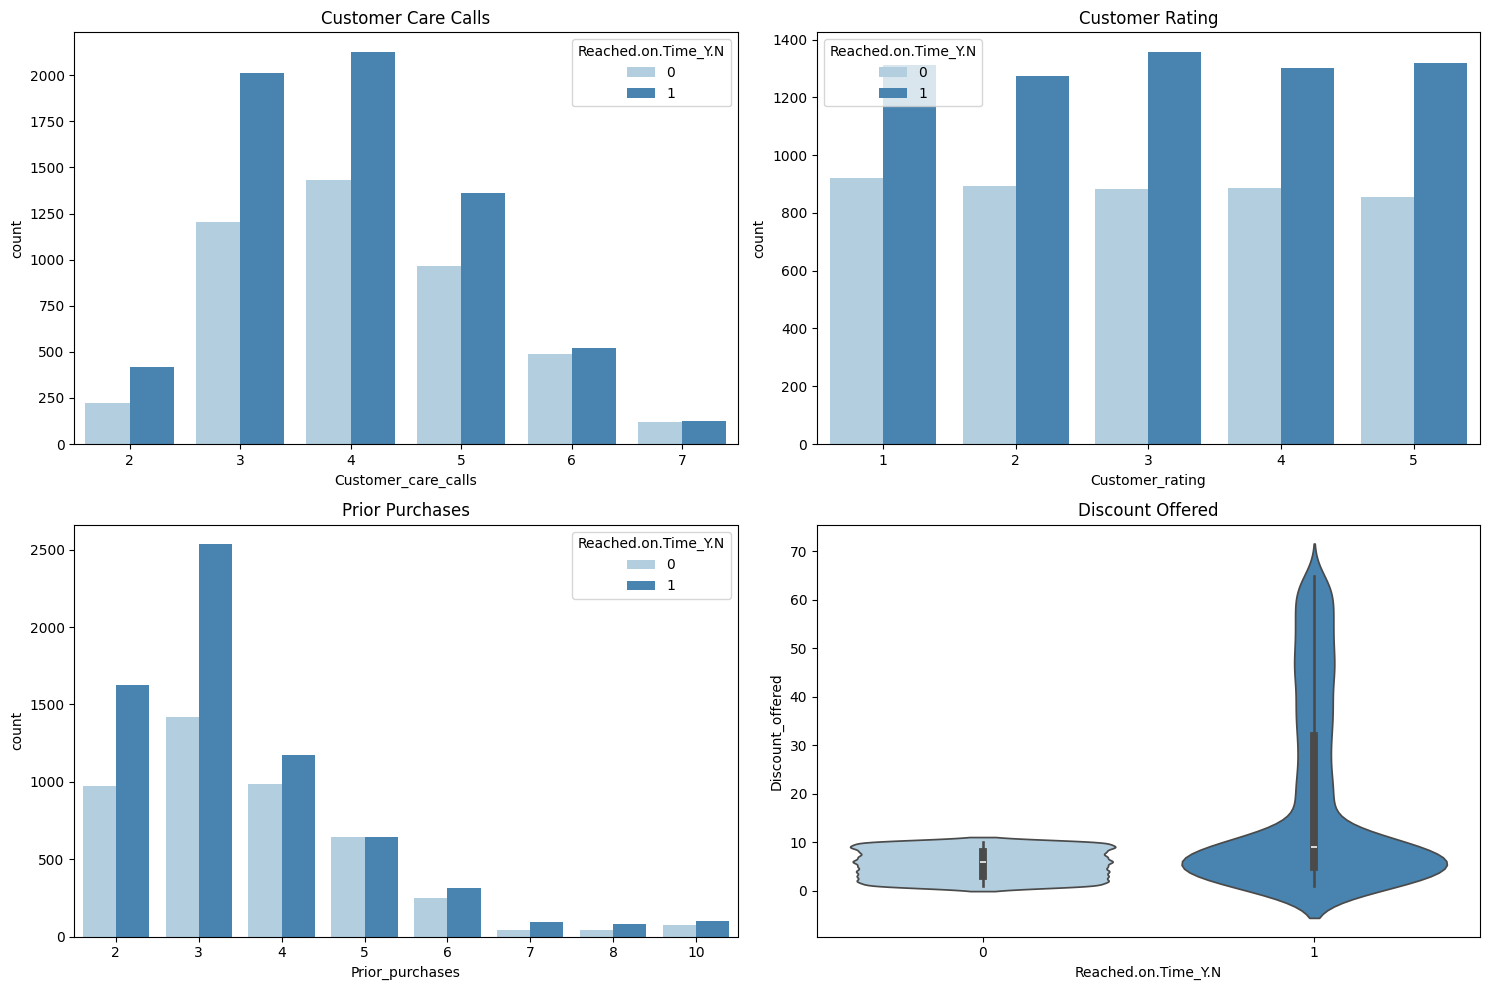

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x='Customer_care_calls', data=df, ax=ax[0,0], hue='Reached.on.Time_Y.N', palette='Blues').set_title('Customer Care Calls')

sns.countplot(x='Customer_rating', data=df, ax=ax[0,1], hue='Reached.on.Time_Y.N', palette='Blues').set_title('Customer Rating')

sns.countplot(x='Prior_purchases', data=df, ax=ax[1,0], hue='Reached.on.Time_Y.N', palette='Blues').set_title('Prior Purchases')

sns.violinplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=df, ax=ax[1,1], palette='Blues').set_title('Discount Offered')

plt.tight_layout()
plt.show()


- The graphs highlight the relationship between customer experience and product delivery. The first shows that more customer care calls correlate with delayed delivery, as customers grow anxious. The second indicates that higher customer ratings are linked to timely delivery. The third reveals that customers with more prior purchases experience better delivery times. Finally, the fourth shows that products with discounts over 10% are more likely to be delivered on time, while those with smaller discounts often face delays.

### Data Preprocessing 2

#### Label Encoding the Categorical Variables

In [22]:
from sklearn.preprocessing import LabelEncoder

#Label encoding object
le = LabelEncoder()

#columns for label encoding
cols = ['Warehouse_block','Mode_of_Shipment','Product_importance', 'Gender']

#label encoding
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Warehouse_block [3 4 0 1 2]
Mode_of_Shipment [0 2 1]
Product_importance [1 2 0]
Gender [0 1]


#### Correlation Matrix Heatmap

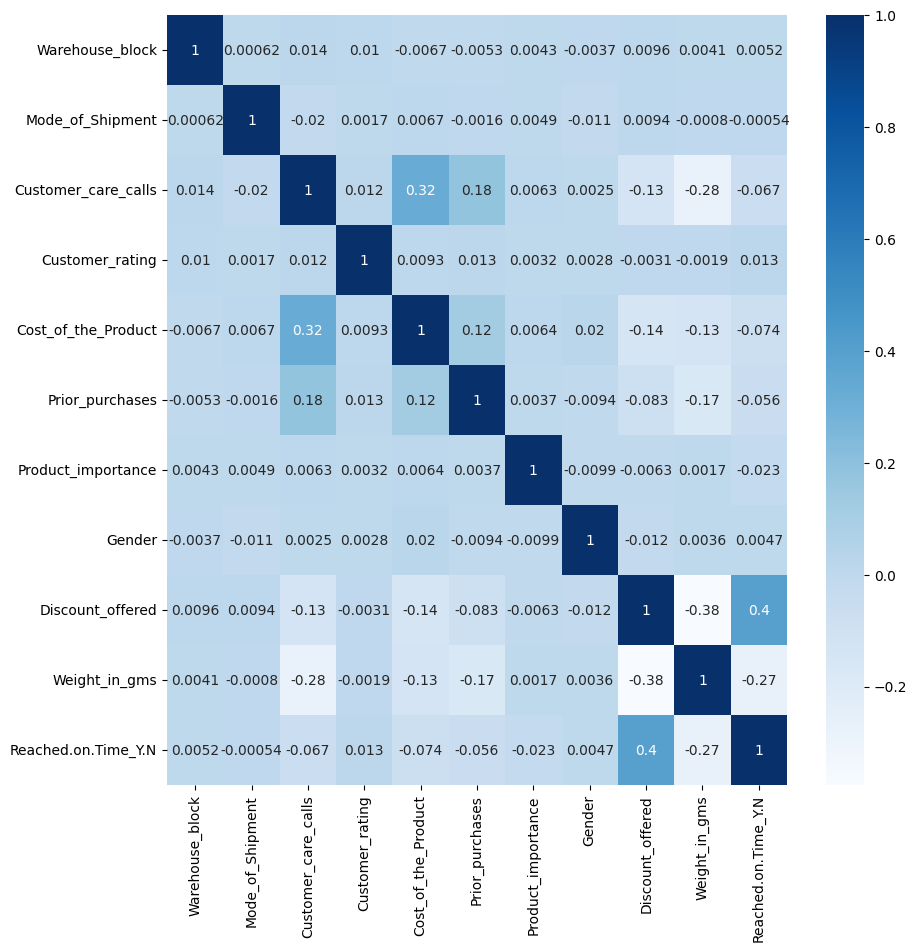

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

plt.show()

- In the correlation matrix heatmap, we can see that there is positive correlation between cost of product and number of customer care calls.


<Axes: xlabel='Customer_care_calls', ylabel='Cost_of_the_Product'>

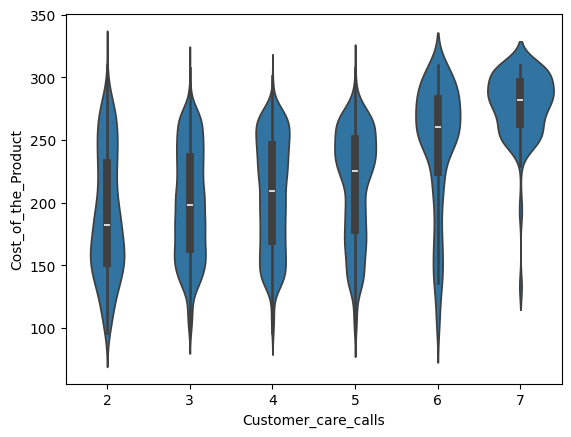

In [24]:
sns.violinplot(x = 'Customer_care_calls', y = 'Cost_of_the_Product', data = df)

- It is clear that customer are more concern regarding the delivery of the product when the cost of the product is high. This is the reason that they call the customer care to know the status of the product. So, it is important to make sure the delivery of the product is on time when the cost of the product is high.

### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Reached.on.Time_Y.N', axis=1), df['Reached.on.Time_Y.N'], test_size=0.2, random_state=0)

### Model Building

#### Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]}

grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid.fit(X_train, y_train)

print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 0}


In [32]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=6, min_samples_split=2, random_state=0, class_weight='balanced')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=6,
                       random_state=0)

In [33]:
print('Training accuracy: ', dtc.score(X_train, y_train))

Training accuracy:  0.6913285600636436


In [34]:
dtc_pred = dtc.predict(X_test)

#### Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4,8,12,16],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid.fit(X_train, y_train)

print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 42}


In [38]:
rfc = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=8, min_samples_split=2, random_state=42)

rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, random_state=42)

In [39]:
print('Training accuracy: ', rfc.score(X_train, y_train))

Training accuracy:  0.7253096942834413


In [40]:
rfc_pred = rfc.predict(X_test)

#### K Nearest Neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
knn.score(X_train, y_train)

0.7780429594272077

In [44]:
knn_pred = knn.predict(X_test)

### Model Evaluation

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score, mean_squared_error

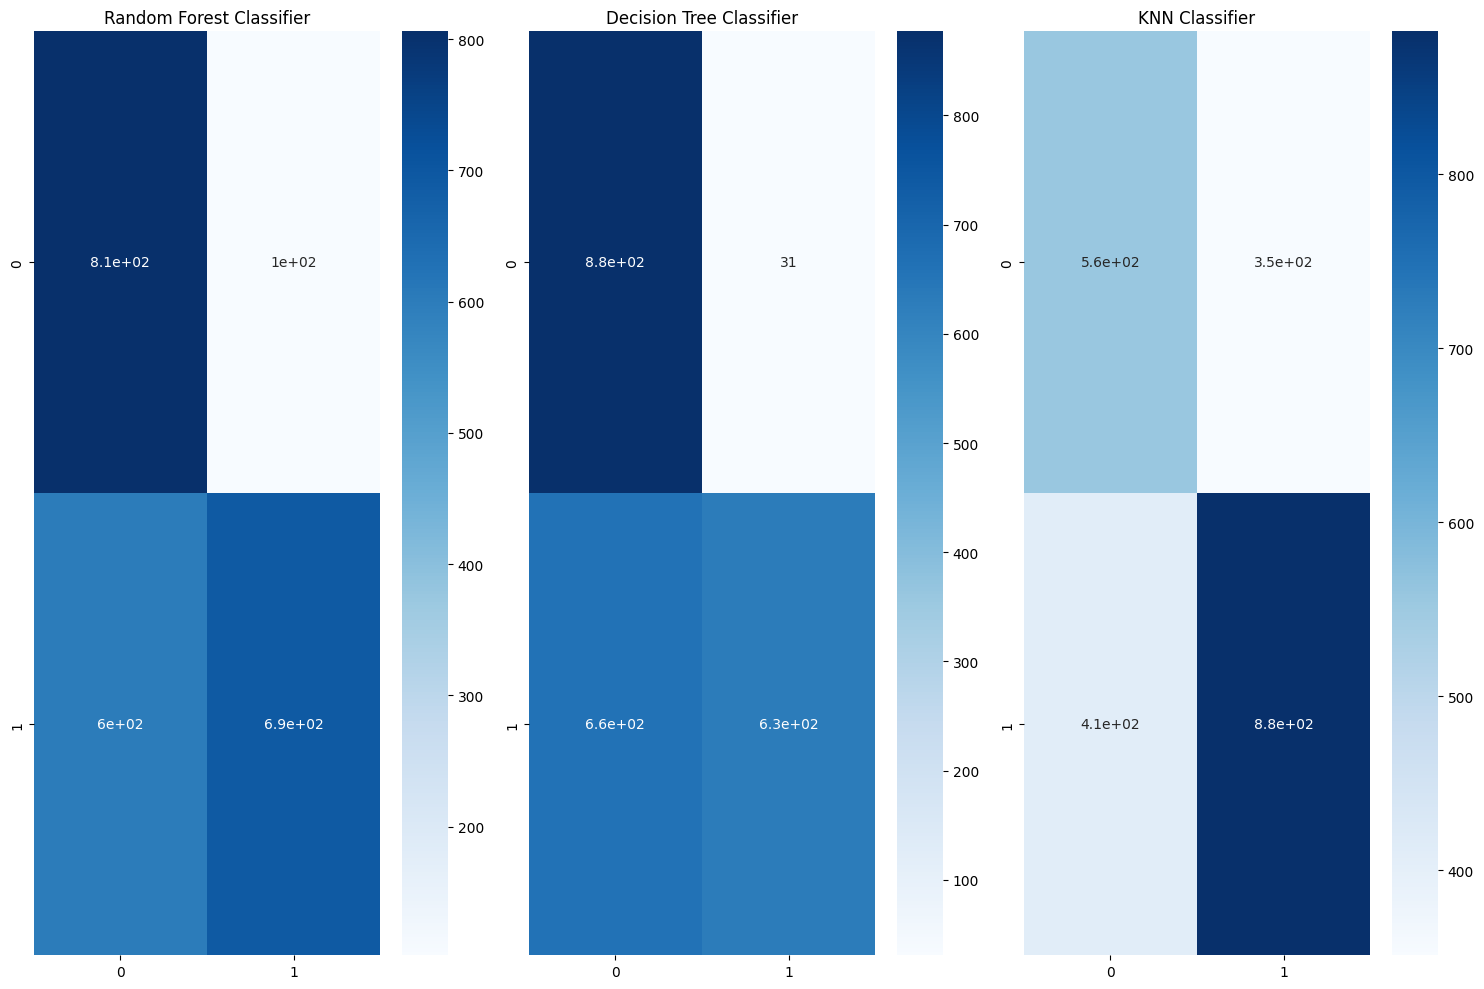

In [46]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='Blues', ax=ax[0]).set_title('Random Forest Classifier')

sns.heatmap(confusion_matrix(y_test, dtc_pred), annot=True, cmap='Blues', ax=ax[1]).set_title('Decision Tree Classifier')

sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='Blues', ax=ax[2]).set_title('KNN Classifier')
plt.tight_layout()
plt.show()

In [47]:
from sklearn.metrics import classification_report

# Classification report cho từng mô hình
print('Random Forest Classifier: \n', classification_report(y_test, rfc_pred))
print('-' * 50)  # Thêm dấu gạch ngang để phân cách
print('Decision Tree Classifier: \n', classification_report(y_test, dtc_pred))
print('-' * 50)  # Thêm dấu gạch ngang để phân cách
print('KNN Classifier: \n', classification_report(y_test, knn_pred))
print('-' * 50)  # Thêm dấu gạch ngang để phân cách


Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.89      0.70       908
           1       0.87      0.54      0.66      1292

    accuracy                           0.68      2200
   macro avg       0.72      0.71      0.68      2200
weighted avg       0.75      0.68      0.68      2200

--------------------------------------------------
Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.97      0.72       908
           1       0.95      0.49      0.65      1292

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.68      2200
weighted avg       0.80      0.69      0.68      2200

--------------------------------------------------
KNN Classifier: 
               precision    recall  f1-score   support

           0       0.58      0.61      0.59       908
           1       0.72      0.68      0.70      1292

    ac

#### Model Comparison

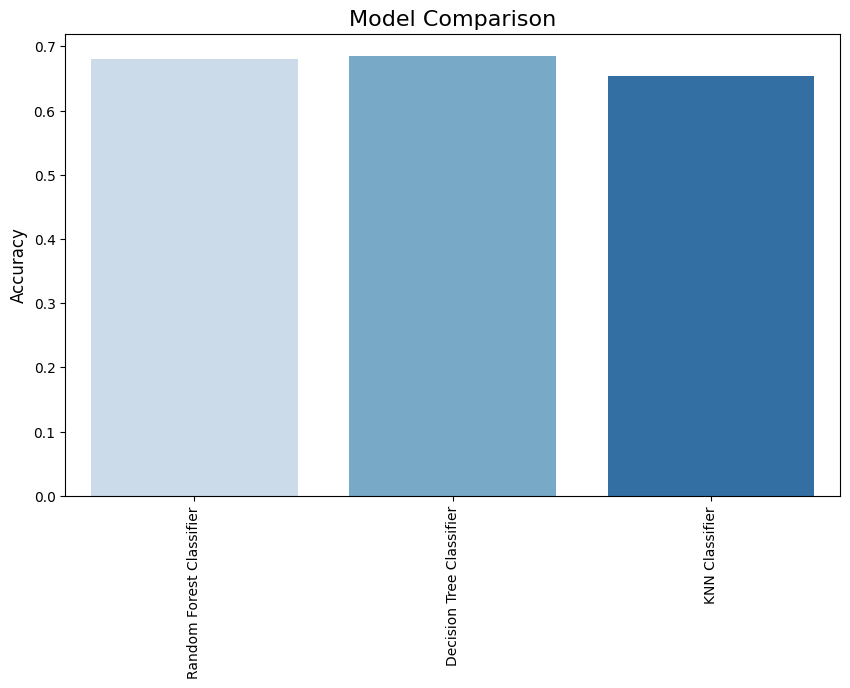

In [49]:
models = ['Random Forest Classifier', 'Decision Tree Classifier', 'KNN Classifier']
accuracy = [accuracy_score(y_test, rfc_pred),
            accuracy_score(y_test, dtc_pred),
            accuracy_score(y_test, knn_pred)]
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy, palette='Blues')
plt.title('Model Comparison', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Accuracy', fontsize=12)
plt.show()


### Conclusion

- The project aimed to predict whether a product from an e-commerce company would be delivered on time while analyzing factors influencing delivery and customer behavior. Exploratory data analysis revealed that products weighing between 2500-3500 grams and costing less than $250 had a higher on-time delivery rate. Most products were shipped from warehouse F, suggesting its proximity to a seaport.

- Customer behavior also plays a role in timely delivery. Increased customer calls correlated with delivery delays, while customers with more prior purchases tended to receive their products on time. Products with discounts of 0-10% were more likely to be delivered late, while those with discounts over 10% had higher on-time delivery rates.

- In terms of machine learning models, the decision tree classifier achieved the highest accuracy at 69%, followed by the random forest classifier at 68%. The K-Nearest Neighbors model had the lowest accuracy at 65%.-